# 計算MODIS的熱感資料
目標檔案是2016/7/21到2016/10/13的資料,美國的這一段期間,在 Soberanes 有大火.

In [28]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import os
#import matplotlib.pyplot as plt

#path = 'raw/MODIS_C6_South_Asia_7d.csv'
#目標檔案是2016/7/21到2016/10/13的資料,美國的這一段期間,在 Soberanes 有大火.
path = 'raw/soberanes_modis/fire_archive_M6_10629.csv'


rawDF = pd.read_csv(path)
print [rawDF[:5]]


[   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0    30.944    -88.010       304.0   1.5    1.2  2016-07-21       344   
1    33.012    -79.888       320.4   1.3    1.1  2016-07-21       344   
2    33.011    -79.879       308.1   1.3    1.1  2016-07-21       344   
3    31.589    -92.257       302.9   2.7    1.6  2016-07-21       344   
4    37.233    -82.040       302.4   1.2    1.1  2016-07-21       345   

  satellite instrument  confidence  version  bright_t31   frp  
0     Terra      MODIS          58      6.1       290.0   7.5  
1     Terra      MODIS         100      6.1       295.0  23.2  
2     Terra      MODIS          73      6.1       295.0   9.2  
3     Terra      MODIS          52      6.1       288.0  13.9  
4     Terra      MODIS          49      6.1       291.5   6.2  ]


In [29]:
dateList = sorted(list(set(rawDF['acq_date']))) #所有拍照日期都是unique的

#dateList[0]是 2016-7-21

firstDate = dateList[0]

firstDF = rawDF[rawDF['acq_date'] == firstDate]

#print (firstDF[:5])
print (firstDate)
print (firstDF[-2:-1]) #2016/7/21 這一天有 347 筆資料

dateFrameDic = {}
for date in dateList:
    dateFrameDic[date] = rawDF[rawDF['acq_date'] == date] #這一步把每一個DF切成以日為單位!開始疊圖

2016-07-21
     latitude  longitude  brightness  scan  track    acq_date  acq_time  \
346    19.404    -155.28       428.4   1.1    1.1  2016-07-21      2354   

    satellite instrument  confidence  version  bright_t31    frp  
346      Aqua      MODIS         100      6.1       322.0  549.0  


In [58]:

#下面這兩行怪怪的，如果照
sobaranes0721 = dateFrameDic[dateList[0]][dateFrameDic[dateList[0]]['latitude']<36.5600] 
sobaranes0721 = sobaranes0721[sobaranes0721['latitude'] > 36.36]
print (sobaranes0721)




     latitude  longitude  brightness  scan  track    acq_date  acq_time  \
261    36.372    -89.862       318.4   1.1    1.0  2016-07-21      1902   
266    36.419    -90.579       318.3   1.1    1.1  2016-07-21      1902   

    satellite instrument  confidence  version  bright_t31  frp  
261      Aqua      MODIS          59      6.1       300.2  8.6  
266      Aqua      MODIS          64      6.1       301.5  9.2  


## 為什麼只有兩筆呢?

因為這顆衛星是繞著緯線上跑的。所以在 07/21 這一天，他並沒有 Soberanes 地區的資料!

下面這個只是測試一下畫圖的

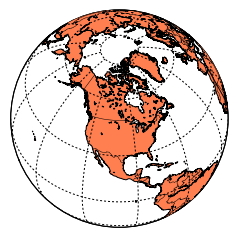

In [3]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
 
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=50, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()

my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
    
plt.show()

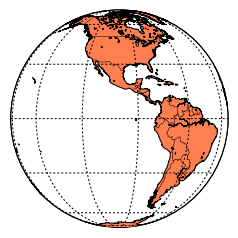

In [4]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='ortho', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

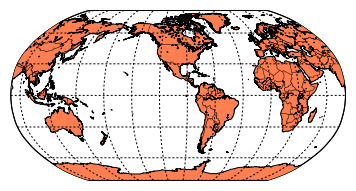

In [5]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='robin', lat_0=0, lon_0=-100,
              resolution='l', area_thresh=1000.0)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

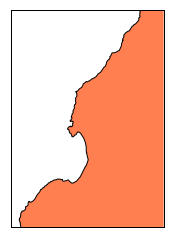

In [8]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=36.4599, lon_0=-121.8994,
    resolution = 'h', area_thresh = 1000.0,
    llcrnrlon=-122.5, llcrnrlat=37.3,
    urcrnrlon=-121.1, urcrnrlat=35.7)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()

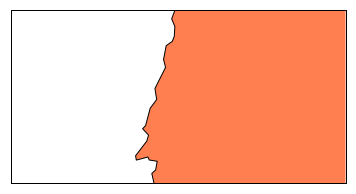

In [10]:
# make sure the value of resolution is a lowercase L,
#  for 'low', not a numeral 1
my_map = Basemap(projection='merc', lat_0=36.4599, lon_0=-121.8994,
    resolution = 'h', area_thresh = 0.1,
    llcrnrlon=-122.1225, llcrnrlat=36.5500,
    urcrnrlon=-121.6762, urcrnrlat=36.36398)
 
my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color='coral')
my_map.drawmapboundary()
 
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
 
plt.show()